### step 1 Data Loading

In [37]:
# Load the dataset
import pandas as pd
df = pd.read_csv('abalone.csv', encoding='Latin-1')

# Preview dataset
print(df.head())
print(df.info())


  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-nu

### step 2 Data Preprocessing

In [38]:
print(df.isnull().sum())  # Check for NaNs
print(df.describe())      # Check for unusual statistics (e.g., zeros or negatives in features)


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64
            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
me

In [39]:
# Add 'Age' column
df['Age'] = df['Rings'] + 1.5

# Encode 'Sex' using label encoding
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1, 'I': 2})

# Split into features (X) and targets (y)
X = df.drop(columns=['Rings', 'Age'])
y_reg = df['Age']  # For regression
y_clf = pd.cut(df['Age'], bins=[0, 10, 20, 40], labels=[0, 1, 2])  # For classification
df.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    0   0.455     0.365   0.095        0.5140          0.2245   
1    0   0.350     0.265   0.090        0.2255          0.0995   
2    1   0.530     0.420   0.135        0.6770          0.2565   
3    0   0.440     0.365   0.125        0.5160          0.2155   
4    2   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  Rings   Age  
0          0.1010         0.150     15  16.5  
1          0.0485         0.070      7   8.5  
2          0.1415         0.210      9  10.5  
3          0.1140         0.155     10  11.5  
4          0.0395         0.055      7   8.5

### spliting the dataset

In [40]:
# Split dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_clf_train, y_clf_test = train_test_split(X, y_clf, test_size=0.2, random_state=42)

# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Step 3: Regression Model
### Train and evaluate a regression model to predict Age.

Random Forest Regressor


In [41]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train, y_reg_train)

# Predict using Random Forest
y_reg_pred_rf = rf_regressor.predict(X_test)

Gradient Boosting Regressor


In [42]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting Regressor
gbr_regressor = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gbr_regressor.fit(X_train, y_reg_train)

# Predict using Gradient Boosting
y_reg_pred_gb = gbr_regressor.predict(X_test)

### Step 4: Classification Model
### Train and evaluate a classification model to group abalones into age categories.

Random Forest Classifier


In [43]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train, y_clf_train)

# Predict using Random Forest
y_clf_pred_rf = rf_classifier.predict(X_test)

 Gradient boosting classifier 

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_classifier.fit(X_train, y_clf_train)

# Predict using Gradient Boosting
y_clf_pred_gb = gb_classifier.predict(X_test)

### Step 5: Evaluate Both Models
#### Regression Metrics

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest Regressor
mse_rf = mean_squared_error(y_reg_test, y_reg_pred_rf)
r2_rf = r2_score(y_reg_test, y_reg_pred_rf)

# Gradient Boosting Regressor
mse_gb = mean_squared_error(y_reg_test, y_reg_pred_gb)
r2_gb = r2_score(y_reg_test, y_reg_pred_gb)

# Print Results
print("Regression Results:")
print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")
print(f"Gradient Boosting - MSE: {mse_gb:.2f}, R²: {r2_gb:.2f}")

Regression Results:
Random Forest - MSE: 5.08, R²: 0.53
Gradient Boosting - MSE: 5.10, R²: 0.53


#### Classification Metrics

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Random Forest Classifier Results:")
print(f"Accuracy: {accuracy_score(y_clf_test, y_clf_pred_rf):.2f}")
print("Classification Report:")
print(classification_report(y_clf_test, y_clf_pred_rf))

print("Gradient Boosting Classifier Results:")
print(f"Accuracy: {accuracy_score(y_clf_test, y_clf_pred_gb):.2f}")
print("Classification Report:")
print(classification_report(y_clf_test, y_clf_pred_gb))

Random Forest Classifier Results:
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       279
           1       0.83      0.91      0.87       536
           2       0.00      0.00      0.00        21

    accuracy                           0.83       836
   macro avg       0.55      0.54      0.54       836
weighted avg       0.80      0.83      0.81       836

Gradient Boosting Classifier Results:
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       279
           1       0.83      0.90      0.86       536
           2       0.00      0.00      0.00        21

    accuracy                           0.82       836
   macro avg       0.54      0.54      0.54       836
weighted avg       0.80      0.82      0.81       836



c:\Users\yuaan.hussain\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yuaan.hussain\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yuaan.hussain\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

### Step 5: Visualizations
### Visualize feature importance and classification results.

#### Regression: Predicted vs Actual for Both Models

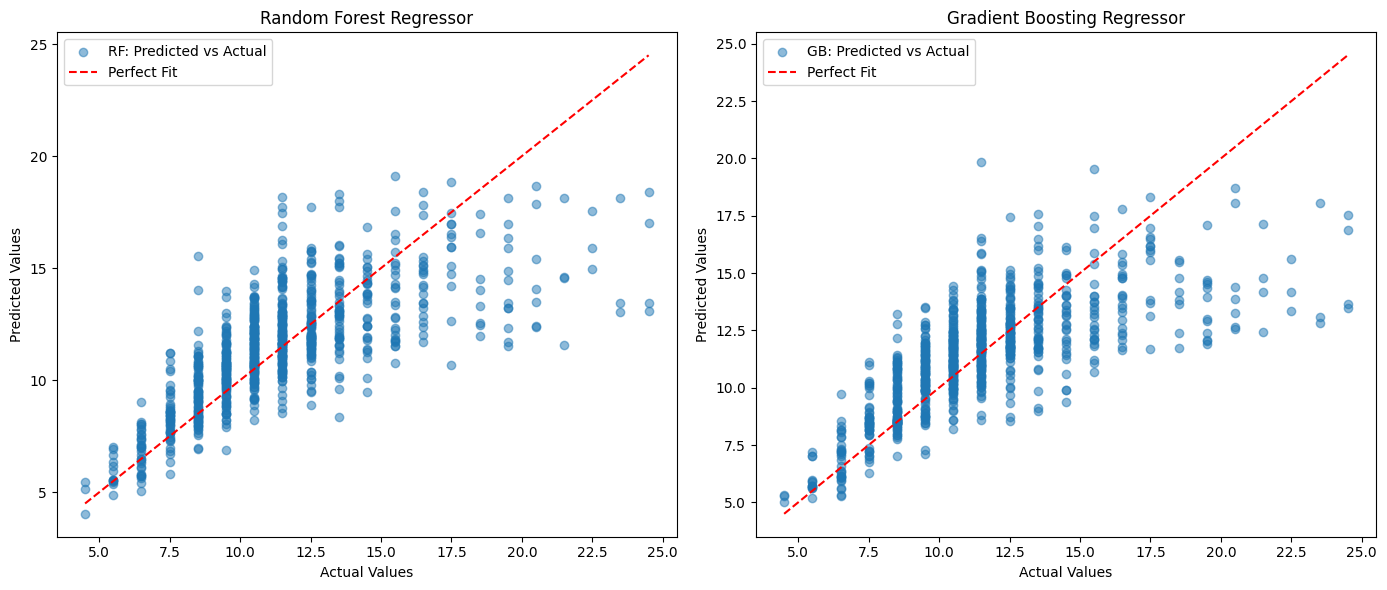

In [47]:
import matplotlib.pyplot as plt

# Compare Predicted vs Actual for Random Forest and Gradient Boosting
plt.figure(figsize=(14, 6))

# Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_reg_test, y_reg_pred_rf, alpha=0.5, label="RF: Predicted vs Actual")
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', label="Perfect Fit")
plt.title("Random Forest Regressor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()

# Gradient Boosting
plt.subplot(1, 2, 2)
plt.scatter(y_reg_test, y_reg_pred_gb, alpha=0.5, label="GB: Predicted vs Actual")
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', label="Perfect Fit")
plt.title("Gradient Boosting Regressor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()

plt.tight_layout()
plt.show()

#### Classification: Confusion Matrix for Both Models

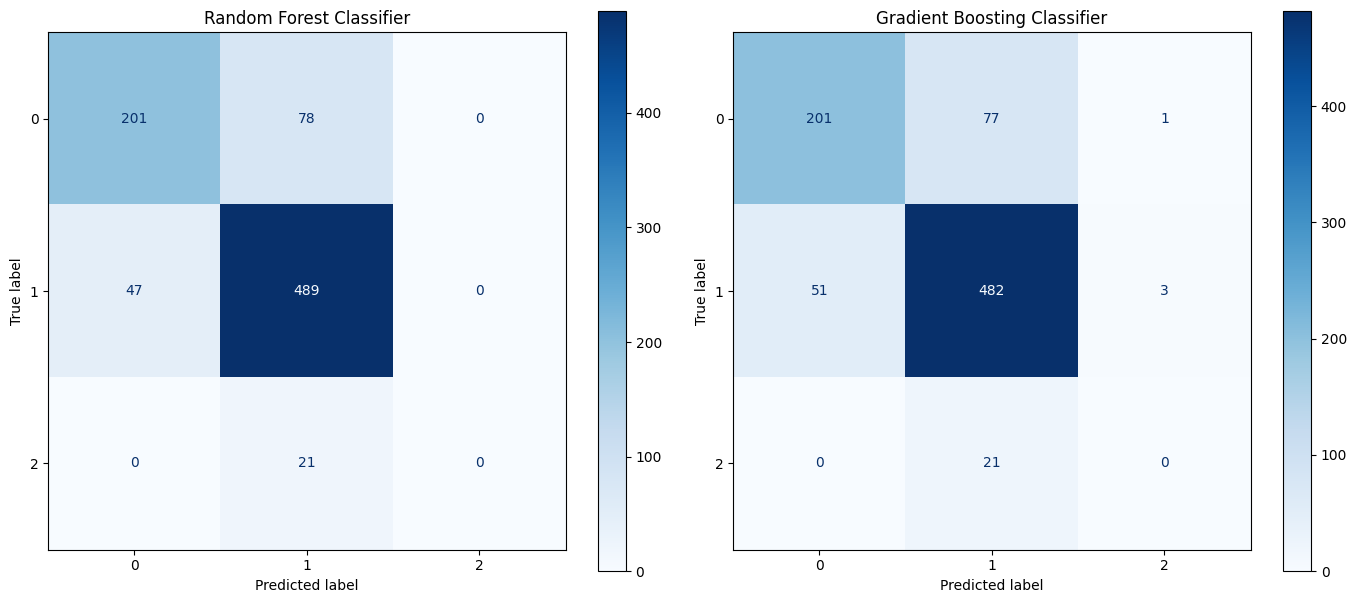

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Random Forest
cm_rf = confusion_matrix(y_clf_test, y_clf_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0, 1, 2])

# Gradient Boosting
cm_gb = confusion_matrix(y_clf_test, y_clf_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=[0, 1, 2])

# Plot Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

disp_rf.plot(ax=ax[0], cmap="Blues")
ax[0].set_title("Random Forest Classifier")

disp_gb.plot(ax=ax[1], cmap="Blues")
ax[1].set_title("Gradient Boosting Classifier")

plt.tight_layout()
plt.show()

### Feature Importance Plots

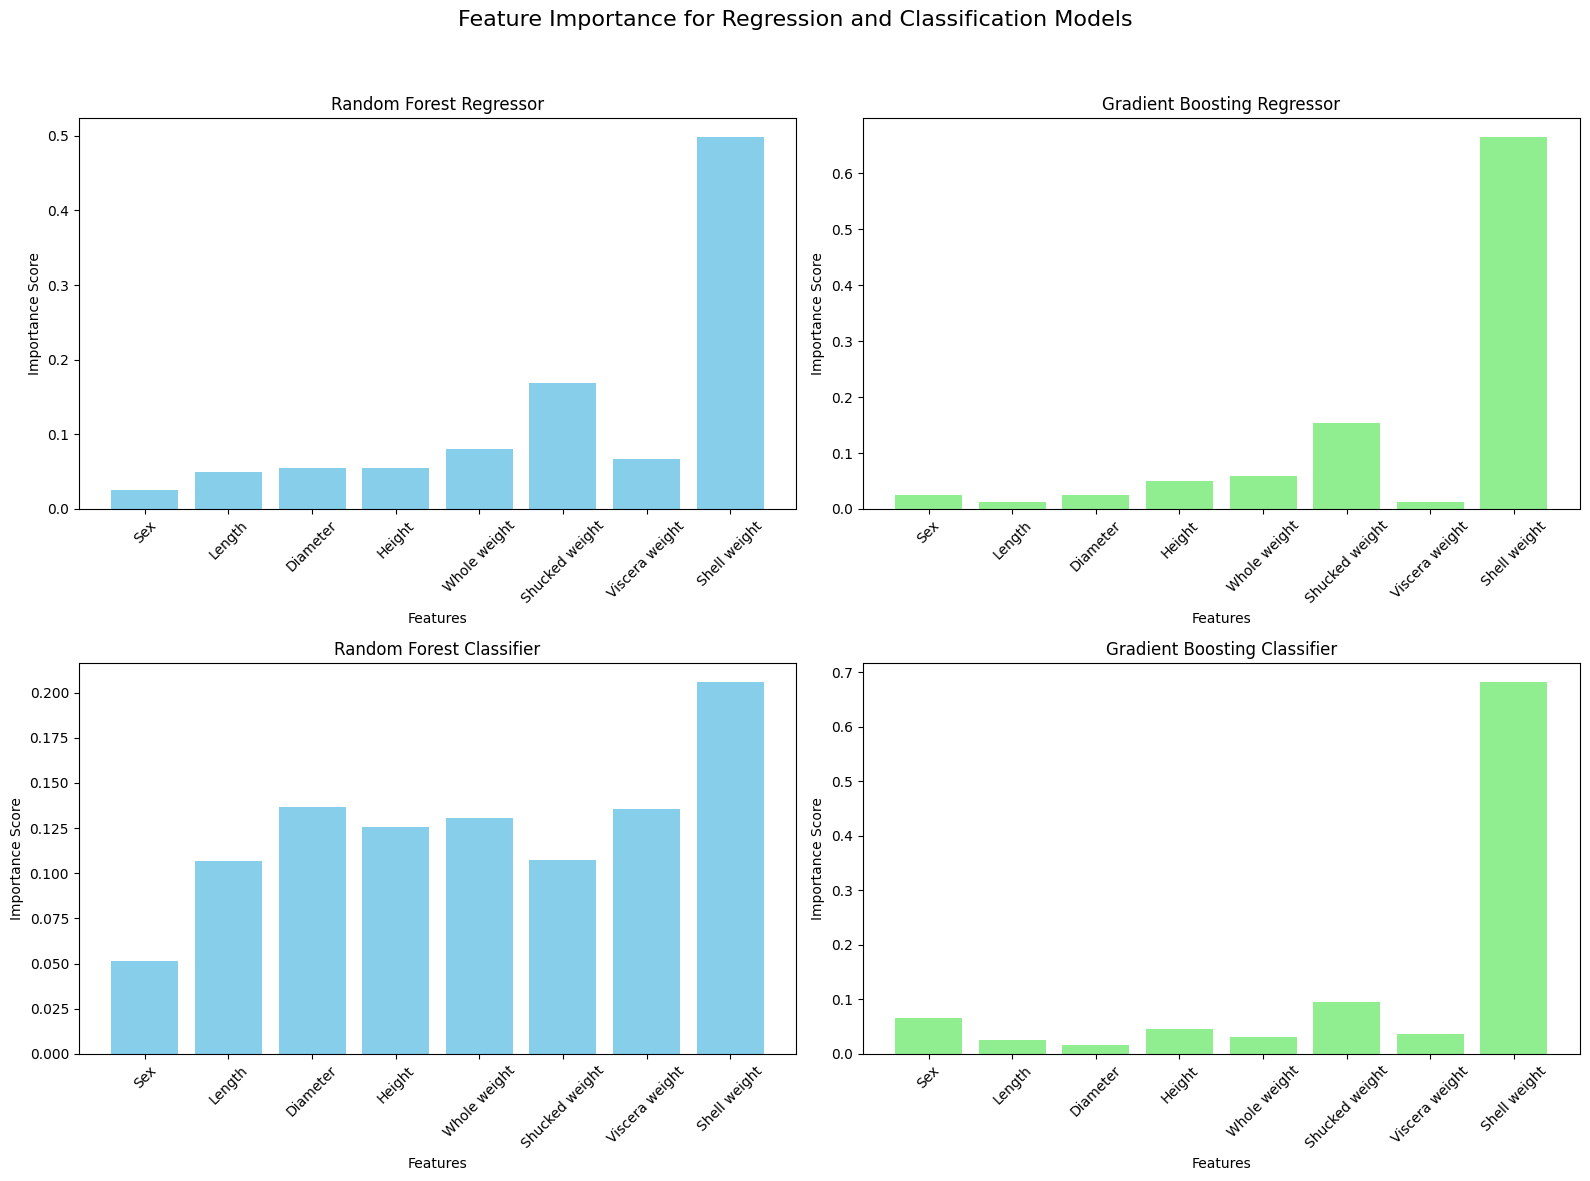

In [54]:
import matplotlib.pyplot as plt

# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Adjust spacing
fig.suptitle("Feature Importance for Regression and Classification Models", fontsize=16)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Subplot 1: Random Forest Regressor
axes[0, 0].bar(X.columns, feature_importance_rf_r, color='skyblue')
axes[0, 0].set_title("Random Forest Regressor")
axes[0, 0].set_xlabel("Features")
axes[0, 0].set_ylabel("Importance Score")
axes[0, 0].tick_params(axis='x', rotation=45)

# Subplot 2: Gradient Boosting Regressor
axes[0, 1].bar(X.columns, feature_importance_gb_r, color='lightgreen')
axes[0, 1].set_title("Gradient Boosting Regressor")
axes[0, 1].set_xlabel("Features")
axes[0, 1].set_ylabel("Importance Score")
axes[0, 1].tick_params(axis='x', rotation=45)

# Subplot 3: Random Forest Classifier
axes[1, 0].bar(X.columns, rf_feature_importance_c, color='skyblue')
axes[1, 0].set_title("Random Forest Classifier")
axes[1, 0].set_xlabel("Features")
axes[1, 0].set_ylabel("Importance Score")
axes[1, 0].tick_params(axis='x', rotation=45)

# Subplot 4: Gradient Boosting Classifier
axes[1, 1].bar(X.columns, gb_feature_importance_c, color='lightgreen')
axes[1, 1].set_title("Gradient Boosting Classifier")
axes[1, 1].set_xlabel("Features")
axes[1, 1].set_ylabel("Importance Score")
axes[1, 1].tick_params(axis='x', rotation=45)

# Show the combined plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the suptitle
plt.show()


---